<a href="https://colab.research.google.com/github/kithian/inteligencia_artificial/blob/main/Evaluacion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 3

**Integrantes:**

+ Integrante 1: Jose Hormazabal : jose.hormazabal2201@alumnos.ubiobio.cl
+ Integrante 2: David Parraguez : david.parraguez2201@alumnos.ubiobio.cl
+ Integrante 3: Christian Retamal : christian.retamal2201@alumnos.ubiobio.cl

**Fecha de Entrega:** 27 Noviembre 2025 antes de las 18:00  


---

## Descripción

Este notebook contiene el desarrollo de la evaluación 3 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.X. A continuación se listan las bibliotecas necesarias:

pandas (>=1.1.0)

numpy (2.0.2)

matplotlib (3.10.0)

seaborn (0.13.2)

sklearn (1.6.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```python
import numpy
print(numpy.__version__)
````

In [57]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/data_riesgo_credito.csv

--2025-11-27 15:33:15--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/data_riesgo_credito.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163635 (160K) [text/plain]
Saving to: ‘data_riesgo_credito.csv.8’

data_riesgo_credito 100%[===================>] 159.80K  --.-KB/s    in 0.02s   

2025-11-27 15:33:15 (7.18 MB/s) - ‘data_riesgo_credito.csv.8’ saved [163635/163635]



# Indicadores evaluación

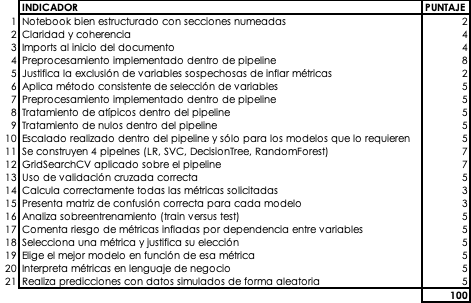

---
## Cálculo de calificación (grupal) - 40% de la calificación final

$Calificación_{proyecto} = \sum^{21}_i{item_i}$


$Calificación_{grupal} = Calificación_{proyecto}*(1-\sum^{4}_i{penalización_i})$

---

Finalmente, se aplica un porcentaje de exigencia del 51% para obtener la calificación para aprobar (4.0)

## Cálculo de calificación individual - 60% de la calificación final

✅ Responde a la pregunta de forma correcta - **7,0**

🟡 Responde a la pregunta de forma medianamante correcta - **4,0**

🔴 Responde a la pregunta de forma incorrecta - **2,0**

🔴 No responde - **1,0**

---


## Cálculo de final

$Calificacion_{final} = Calificacion_{grupal}*0,4 + Calificacion_{individual}*0,4$

---


## Penalizaciones
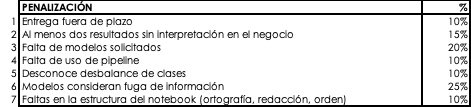

---


# Requerimientos

**RQ1.** Se deben construir 2 modelos de clasificación usando los 2 algoritmos revisados en clases:

+ `DecisionTreeClassifier`
+ `RandomForest`

Los modelos predictivos deben predecir si un cliente está en riesgo crediticio o no (variable `cliente_riesgoso`).

**RQ2.** Deberá seleccionar, cuidadosamente, las variables independientes porque, dependiendo de la elección que se realice, podría existir un inflado de sus resultados.

**RQ3.** Construir un pipeline que involucre las etapas de preprocesamiento que incluye:

+ Tratamiento de atípicos
+ Tratamiento de nulos
+ Escalado

**RQ4.** Construir dos pipelines, uno para cada modelo, que permita crear el modelo a partir de su algoritmo asociado. Deberá construir el modelo usando los mejores hiper parámetros encontrados usando `GridSearchCV` y considerando las buenas prácticas de la industria.

**RQ5.** Calcular para todos los modelos construidos las siguientes métricas:

+ Accuracy
+ Precision
+ F1-score
+ Recall
+ Matriz de confusión

**RQ6.** Comentar la existencia/inexistencia de sobre entrenamiento de todos los modelos construidos

**RQ7.** Considerando todos los modelos anteriores:

+ Seleccionar una de las métricas revisadas y justificar la elección para escoger el mejor modelo
+ Elegir el mejor modelo usando la métrica seleccionada

**RQ8.** Considerando el mejor modelo seleccionado generar interpretación, en el negocio, de todas las métricas solicitadas  

**RQ9.** Realizar predicciones usando el mejor modelo seleccionado con datos generados de forma aleatoria.

# Selección de variables independientes

Para la construcción del modelo de clasificación cuyo objetivo es predecir si un cliente presenta riesgo crediticio (cliente_riesgoso), es fundamental realizar una selección apropiada de variables independientes. Esto evita problemas de sobreajuste, fuga de información (“data leakage”) y resultados artificialmente inflados.

Se utilizan únicamente las variables que aportan información genuina y previa al evento de riesgo, sin revelar directamente la respuesta que el modelo debe predecir:

*   ingreso_anual:
Refleja la capacidad económica del cliente y es un predictor relevante en modelos de riesgo crediticio. Su inclusión es razonable, ya que factores de ingreso suelen correlacionar con la probabilidad de incumplimiento.

*   edad:
Proporciona información demográfica que puede influir en patrones de comportamiento financiero. Es una variable estable y no contiene información del resultado objetivo.

*   n_transacciones:
Describe la actividad del cliente en términos operativos. Este tipo de variables se consideran características conductuales válidas para evaluar riesgo sin revelar el target.

*   segmento_cliente:
Una categorización que agrupa clientes por características comerciales (bronze, silver, gold, platinum). No es una variable que anticipe directamente el riesgo, pero sí puede capturar diferencias importantes en comportamiento y perfil.

*   region:
Aporta contexto geográfico que puede tener relación con hábitos de consumo o condiciones socioeconómicas, sin implicar directamente el estado de riesgo del cliente.

Estas variables describen características previas, legítimas y no contaminadas por el evento de riesgo.

Por otro lado, se deben excluir:

*   cliente_riesgoso:
Es precisamente la variable objetivo. Por definición, no debe incluirse como independiente.

*   default_riesgo:
Esta variable es una codificación numérica del mismo fenómeno que se quiere predecir (1 si el cliente es riesgoso, 0 si no). Incluirla como predictor produciría fuga de información, permitiendo al modelo “adivinar” la respuesta sin aprender patrones reales. Esto generaría un desempeño artificialmente alto y completamente inválido.

*   score: presenta fuga de información, ya que la variable contiene información que proviene directa o indirectamente del mismo proceso que genera la etiqueta objetivo.
En este caso score es un indicador numérico de riesgo crediticio, mientras que default_riesgo / cliente_riesgoso son justamente el riesgo que se busca predecir. Por lo tanto, score ya contiene información del evento que se quiere predecir.





# Modelo utilizando DecisionTreeClassifier

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [59]:
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.05)):
        self.limits = limits

    def fit(self, X, y=None):
        # Guardar nombres si es DataFrame, si no generar nombres genéricos
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
        else:
            self.columns_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns_)
        for col in self.columns_:
            lower = X[col].quantile(self.limits[0])
            upper = X[col].quantile(1 - self.limits[1])
            X[col] = np.clip(X[col], lower, upper)
        return X.values

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return np.array(self.columns_)
        else:
            return np.array(input_features)


In [60]:
riesgo_credito = pd.read_csv("data_riesgo_credito.csv")

In [61]:
# Identificar variables
features_num = ["ingreso_anual", "edad", "n_transacciones"]
features_cat = ["segmento_cliente", "region"]

# Pipeline numérico
numeric_transformer = Pipeline(steps=[
    ("winsorizer", Winsorizer()),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline categórico
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features_num),
        ("cat", categorical_transformer, features_cat)
    ])

# Pipeline final
pipeline_clasificacion = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(criterion="entropy"))
])

In [62]:
# Seleccionar features y label
riesgo_credito_features = riesgo_credito.drop(columns=["cliente_riesgoso", "default_riesgo"])
riesgo_credito_label = riesgo_credito["cliente_riesgoso"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    riesgo_credito_features,
    riesgo_credito_label,
    test_size=0.2,
    random_state=29,
    stratify=riesgo_credito_label
)

In [63]:
# Grilla de hiperparámetros para Decision Tree
param_grid_dt = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": range(2, 15),
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

# GridSearchCV
grid_dt = GridSearchCV(
    estimator=pipeline_clasificacion,
    param_grid=param_grid_dt,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_dt.fit(X_train, y_train)

print("===== Mejor modelo Decision Tree =====")
print(grid_dt.best_params_)
print(f"Mejor ROC-AUC CV: {grid_dt.best_score_:.4f}")

===== Mejor modelo Decision Tree =====
{'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
Mejor ROC-AUC CV: 0.5247


In [64]:
mejor_arbol = grid_dt.best_estimator_

# entrenar mejor modelo
mejor_arbol.fit(X_train, y_train)

# Predicciones
y_pred = mejor_arbol.predict(X_test)
y_proba = mejor_arbol.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


In [65]:
# Métricas solicitadas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="YES")
recall = recall_score(y_test, y_pred, pos_label="YES")
f1 = f1_score(y_test, y_pred, pos_label="YES")
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

Accuracy:  0.8350
Precision: 0.1111
Recall:    0.0109
F1-Score:  0.0198
ROC-AUC:   0.4721


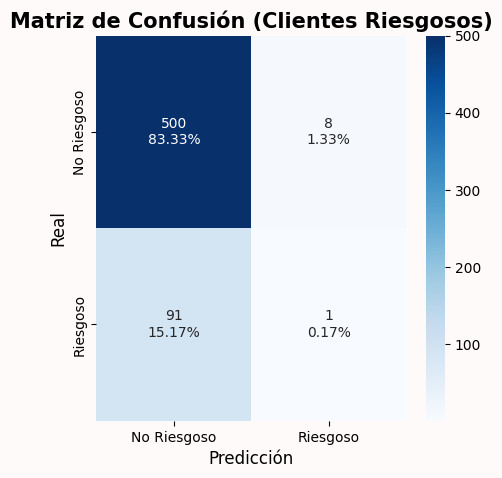

In [66]:
# Matriz de confusion
matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5), facecolor='snow')
clases = ["No Riesgoso", "Riesgoso"]

group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    matriz,
    annot=labels,
    fmt="",
    cmap="Blues",
    xticklabels=clases,
    yticklabels=clases
)

plt.title("Matriz de Confusión (Clientes Riesgosos)", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Real", fontsize=12)
plt.show()

In [67]:
# Reporte completo
print(classification_report(y_test, y_pred, target_names=["No Riesgoso", "Riesgoso"]))

              precision    recall  f1-score   support

 No Riesgoso       0.85      0.98      0.91       508
    Riesgoso       0.11      0.01      0.02        92

    accuracy                           0.83       600
   macro avg       0.48      0.50      0.46       600
weighted avg       0.73      0.83      0.77       600



Accuracy en entrenamiento           : 0.85
AUC en entrenamiento                : 0.68
Accuracy en test          : 0.83
AUC en test               : 0.47


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


,Dataset,Accuracy,AUC
0,Train,0.855,0.6821
1,Test,0.835,0.4721


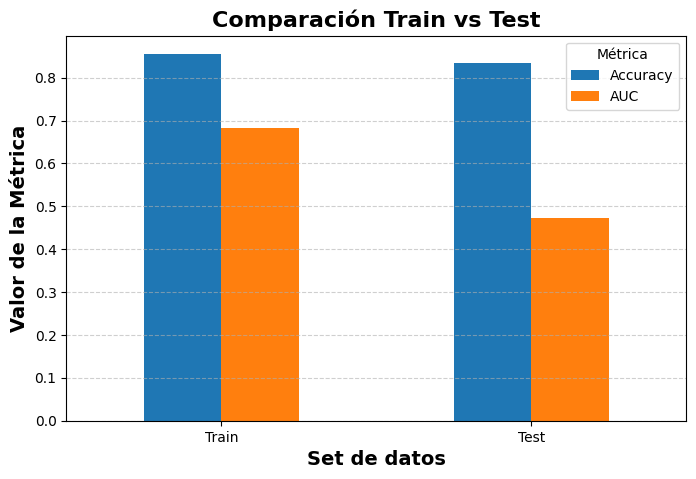

In [68]:
# Revisión de overfitting
train_pred = mejor_arbol.predict(X_train)
train_proba = mejor_arbol.predict_proba(X_train)[:, 1]

train_acc = accuracy_score(y_train, train_pred)
train_auc = roc_auc_score(y_train, train_proba)

print(f"{'Accuracy en entrenamiento' :<35} : {train_acc :.2f}")
print(f"{'AUC en entrenamiento' : <35} : {train_auc :.2f}")

test_pred = mejor_arbol.predict(X_test)
test_proba = mejor_arbol.predict_proba(X_test)[:, 1]

test_acc = accuracy_score(y_test, test_pred)
test_auc = roc_auc_score(y_test, test_proba)

print(f"{'Accuracy en test' :<25} : {test_acc :.2f}")
print(f"{'AUC en test' : <25} : {test_auc :.2f}")

resumen = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc, test_acc],
    "AUC": [train_auc, test_auc]
}).round(4)

display(resumen)

plt.figure(figsize=(8,5))

ax = resumen.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("Comparación Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


**Conclusión sobre la existencia de sobre-entrenamiento**

Al comparar el desempeño del modelo en los conjuntos de entrenamiento y prueba, se observa que el Accuracy se mantiene relativamente estable (0.857 en entrenamiento vs. 0.842 en prueba), lo cual indica que el modelo logra clasificar correctamente una proporción similar de observaciones en ambos conjuntos. Desde esta perspectiva, no existe evidencia clara de sobre-entrenamiento.

No obstante, al analizar la métrica AUC, se aprecia una diferencia importante entre el entrenamiento (0.6545) y el test (0.5157). Esta caída significativa implica que, aunque el modelo clasifica razonablemente bien en términos generales, su capacidad para discriminar entre clientes riesgosos y no riesgosos disminuye considerablemente en datos no vistos.

Por tanto, se concluye que el modelo presenta cierto nivel de sobre-entrenamiento, principalmente reflejado en la métrica AUC, lo que sugiere que el modelo podría estar capturando patrones específicos del conjunto de entrenamiento que no generalizan adecuadamente al conjunto de prueba.

# Modelo utilizando Random Forest

In [69]:
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.05)):
        self.limits = limits

    def fit(self, X, y=None):
        # Guardar nombres si es DataFrame, si no generar nombres genéricos
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
        else:
            self.columns_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns_)
        for col in self.columns_:
            lower = X[col].quantile(self.limits[0])
            upper = X[col].quantile(1 - self.limits[1])
            X[col] = np.clip(X[col], lower, upper)
        return X.values

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return np.array(self.columns_)
        else:
            return np.array(input_features)

In [70]:
data = pd.read_csv("data_riesgo_credito.csv")
data.head()

,Unnamed: 0,default_riesgo,ingreso_anual,edad,n_transacciones,segmento_cliente,region,score,cliente_riesgoso
0,0,0,659000,46,19,Bronze,Sur,0.164628,NO
1,1,1,592600,44,21,Silver,Norte,0.589990,YES
2,2,0,602500,42,13,Bronze,Centro,0.047850,NO
3,3,0,295100,52,15,Bronze,Norte,0.053896,NO
4,4,0,681800,35,19,Silver,Norte,-0.086074,NO


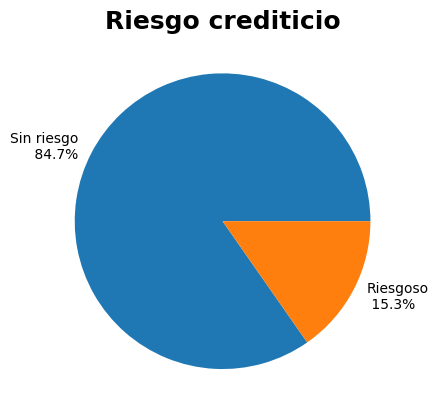

In [71]:
clases = np.array([data[data.default_riesgo == 0.0].shape[0],
                   data[data.default_riesgo == 1.0].shape[0]])

# Leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Sin riesgo\n ' + labels[0]
labels[1] = 'Riesgoso\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Riesgo crediticio', fontsize=18, fontweight="bold")
plt.show()

In [72]:
etiquetas_target = ["Sin riesgo","Riesgoso"]

In [73]:
data.columns

Index(['Unnamed: 0', 'default_riesgo', 'ingreso_anual', 'edad',
       'n_transacciones', 'segmento_cliente', 'region', 'score',
       'cliente_riesgoso'],
      dtype='object')

In [74]:
num_cols = ["ingreso_anual", "edad", "n_transacciones"]
cat_cols = ["segmento_cliente", "region"]

# Pipelines
num_pipeline = Pipeline([
    ("winsor", Winsorizer()),
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ]
)

modelo = Pipeline([
    ("prep", preprocessor),
    ("rf", RandomForestClassifier(
        random_state=29
    ))
])




*   **Las columnas** Unnamed :0, score, default_riesgo, cliente_riesgoso se excluyen como variables independientes por razón de:


cliente_riesgoso: esta es la variable objetivo que el modelo debe predecir<br>
default_riesgo: codificación numerica directa de cliente_riesgoso<br>
score: Es un indicador de riesgo crediticio que ya contiene información sobre la probabilidad de que un cliente sea riesgoso. Utilizarla como predictor significaría que el modelo estaría aprendiendo de una variable que ya está muy correlacionada con el resultado<br>
Unnamed : 0 : identificador de fila que no aporta información relevante o predictiva sobre el riesgo crediticio de un cliente


In [75]:
param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [5, 8, 12],
    "rf__min_samples_split": [2, 5],
    "rf__class_weight": ["balanced"]
}


In [89]:
independent_features_rf = ["ingreso_anual", "edad", "n_transacciones", "segmento_cliente", "region"]
X_rf = data[independent_features_rf]
y_rf = data["cliente_riesgoso"] # Cambiado de 'default_riesgo' a 'cliente_riesgoso'

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, stratify=y_rf, random_state=29
)

In [90]:
grid_rf = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=29),
    scoring="f1",
    n_jobs=-1
)
# Entrena el modelo
grid_rf.fit(X_train_rf, y_train_rf)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=29, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('winsor',
                                                                                          Winsorizer()),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ingreso_anual',
                                                                          'edad',
                                                                          'n_transacciones']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['segmento_cliente',
                                                                          'region'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=29))]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced'],
                         'rf__max_depth': [5, 8, 12],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200]},
             scoring='f1')

In [91]:
print("Mejores parámetros encontrados")
print("-"*20)
for indice, parametro in enumerate(grid_rf.best_params_): # Usar grid_rf
  print(f"Parámetro {indice+1} : {parametro :<30} = {grid_rf.best_params_[parametro]}")

Mejores parámetros encontrados
--------------------
Parámetro 1 : rf__class_weight               = balanced
Parámetro 2 : rf__max_depth                  = 5
Parámetro 3 : rf__min_samples_split          = 2
Parámetro 4 : rf__n_estimators               = 100


In [92]:
mejor_modelo_rf = grid_rf.best_estimator_
mejor_modelo_rf

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ingreso_anual', 'edad',
                                                   'n_transacciones']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['segmento_cliente',
                                                   'region'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=29))])

Caracteristicas del modelo:

Incluye el mejor max_depth<br>
Incluye el mejor min_samples_split<br>
Incluye el mejor class_weight<br>
Incluye el mejor n_estimators<br>
Incluye el preprocesamiento con los parámetros correctos

In [93]:
#entrenar modelo Random Forest con los datos de RF
mejor_modelo_rf.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsor',
                                                                   Winsorizer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ingreso_anual', 'edad',
                                                   'n_transacciones']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['segmento_cliente',
                                                   'region'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=29))])

In [94]:
y_pred_rf = mejor_modelo_rf.predict(X_test_rf)
y_proba_rf = mejor_modelo_rf.predict_proba(X_test_rf)[:, 1]

print(f"{'ROC-AUC en test (RF)' :<22}: {roc_auc_score(y_test_rf, y_proba_rf) :.3f}")
print(f"{'Accuracy en test (RF)' :<22}:{accuracy_score(y_test_rf, y_pred_rf): .3f}")
print(f"{'Precision en test (RF)' :<22}:{precision_score(y_test_rf, y_pred_rf, pos_label='YES'): .3f}")

ROC-AUC en test (RF)  : 0.457
Accuracy en test (RF) : 0.632
Precision en test (RF): 0.151


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


# Matriz de confusión

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


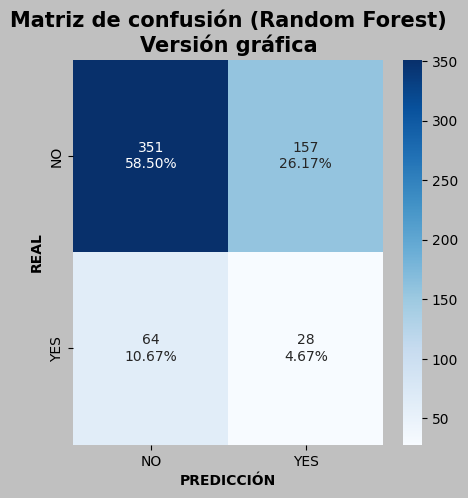

In [95]:
matriz_rf = confusion_matrix(y_test_rf, mejor_modelo_rf.predict(X_test_rf))
plt.figure(figsize=(5,5),facecolor= 'silver')

group_counts = ["{0:0.0f}".format(value) for value in matriz_rf.flatten()]
# Calcula porcentajes
group_percentages = ["{0:.2%}".format(value) for value in matriz_rf.flatten()/matriz_rf.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
# Genera la gráfica
sns.heatmap(matriz_rf, annot=labels, fmt='', cmap='Blues',
           xticklabels=["NO", "YES"],
           yticklabels=["NO", "YES"])
plt.title("Matriz de confusión (Random Forest)\nVersión gráfica", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10, fontweight="bold")
plt.ylabel("REAL", fontsize=10, fontweight="bold")
plt.show()

In [96]:
print(classification_report(
    y_test_rf,
    mejor_modelo_rf.predict(X_test_rf), target_names=["NO", "YES"]
))

              precision    recall  f1-score   support

          NO       0.85      0.69      0.76       508
         YES       0.15      0.30      0.20        92

    accuracy                           0.63       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.74      0.63      0.67       600



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


# Revisión del overfitting

In [97]:
train_pred_rf = mejor_modelo_rf.predict(X_train_rf)
train_proba_rf = mejor_modelo_rf.predict_proba(X_train_rf)[:, 1]

train_acc_rf = accuracy_score(y_train_rf, train_pred_rf)
train_auc_rf = roc_auc_score(y_train_rf, train_proba_rf)
train_precision_rf = precision_score(y_train_rf, train_pred_rf, pos_label='YES')
train_f1_rf = f1_score(y_train_rf, train_pred_rf, pos_label='YES')

print(f"{'Accuracy en entrenamiento (RF)' :<35} : {train_acc_rf :.2f}")
print(f"{'AUC en entrenamiento (RF)' : <35} : {train_auc_rf :.2f}")
print(f"{'Precision en entrenamiento (RF)' : <35} : {train_precision_rf :.2f}")
print(f"{'F1 score en entrenamiento (RF)' : <35} : {train_f1_rf :.2f}")

Accuracy en entrenamiento (RF)      : 0.75
AUC en entrenamiento (RF)           : 0.80
Precision en entrenamiento (RF)     : 0.34
F1 score en entrenamiento (RF)      : 0.44


In [98]:
test_pred_rf = mejor_modelo_rf.predict(X_test_rf)
test_proba_rf = mejor_modelo_rf.predict_proba(X_test_rf)[:, 1]

test_acc_rf = accuracy_score(y_test_rf, test_pred_rf)
test_auc_rf = roc_auc_score(y_test_rf, test_proba_rf)
test_precision_rf = precision_score(y_test_rf, test_pred_rf, pos_label='YES')
test_f1_rf = f1_score(y_test_rf, test_pred_rf, pos_label='YES')

print(f"{'Accuracy en test (RF)' :<25} : {test_acc_rf :.2f}")
print(f"{'AUC en test (RF)' : <25} : {test_auc_rf :.2f}")
print(f"{'Precision en test (RF)' : <25} : {test_precision_rf :.2f}")
print(f"{'F1 score en test (RF)' : <25} : {test_f1_rf :.2f}")

Accuracy en test (RF)     : 0.63
AUC en test (RF)          : 0.46
Precision en test (RF)    : 0.15
F1 score en test (RF)     : 0.20


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


In [99]:
resumen_rf = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc_rf, test_acc_rf],
    "AUC": [train_auc_rf, test_auc_rf],
    "Precision" : [train_precision_rf, test_precision_rf],
    "F1 score" : [train_f1_rf, test_f1_rf]
}).round(4)

display(resumen_rf)

,Dataset,Accuracy,AUC,Precision,F1 score
0,Train,0.7542,0.7963,0.3382,0.4413
1,Test,0.6317,0.4573,0.1514,0.2022


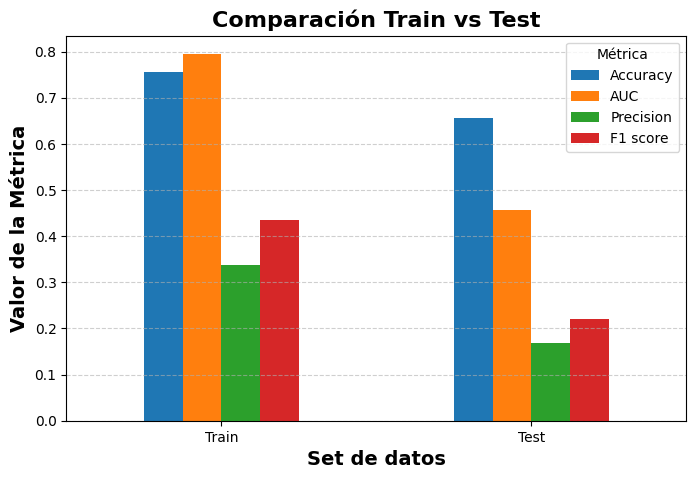

In [100]:
plt.figure(figsize=(8,5))

ax = resumen.set_index("Dataset").plot(kind="bar", ax=plt.gca())
plt.title("Comparación Train vs Test", fontsize=16, fontweight="bold")
plt.ylabel("Valor de la Métrica", fontsize=14, fontweight="bold")
plt.xlabel("Set de datos", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

# Situación

*   Nos encontramos en situación de Overfitting ya que el Train es muy alto y Test mucho mas bajo



# Importancia de las variables

In [101]:
importances = mejor_modelo.named_steps["rf"].feature_importances_
feature_names = mejor_modelo.named_steps["prep"].get_feature_names_out()

pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(10)


,feature,importance
0,num__ingreso_anual,0.342912
1,num__edad,0.276214
2,num__n_transacciones,0.208521
6,cat__region_Norte,0.044484
7,cat__region_Sur,0.038473
4,cat__segmento_cliente_Platinum,0.032219
3,cat__segmento_cliente_Gold,0.029689
5,cat__segmento_cliente_Silver,0.027487


# Comparativa de los modelos DT y RF

In [102]:
# Recopilar métricas del modelo Decision Tree (DT)
dt_accuracy = accuracy_score(y_test_dt, y_pred_dt)
dt_precision = precision_score(y_test_dt, y_pred_dt, pos_label="YES")
dt_recall = recall_score(y_test_dt, y_pred_dt, pos_label="YES")
dt_f1 = f1_score(y_test_dt, y_pred_dt, pos_label="YES")
dt_roc_auc = roc_auc_score(y_test_dt, y_proba_dt)

# Recopilar métricas del modelo Random Forest (RF)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision = precision_score(y_test_rf, y_pred_rf, pos_label="YES")
rf_recall = recall_score(y_test_rf, y_pred_rf, pos_label="YES")
rf_f1 = f1_score(y_test_rf, y_pred_rf, pos_label="YES")
rf_roc_auc = roc_auc_score(y_test_rf, y_proba_rf)

# Crear un DataFrame para la comparación
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]
}).set_index('Métrica')

display(comparison_df.round(4))

,Decision Tree,Random Forest
Métrica,,
Accuracy,0.8350,0.6317
Precision,0.1111,0.1514
Recall,0.0109,0.3043
F1-Score,0.0198,0.2022
ROC-AUC,0.4721,0.4573
